# Celeste Database Exploration

In [1]:
import os
import pandas as pd
import numpy as np

### 1 - Room sizes distribution

So that we kinda have a better idea of what size of room we should generate in the Cskeleton

In [44]:
directory = "../levels/"

l_filenames_fg = []

for folder in os.scandir(directory):
    for filename in os.scandir(folder.path):
        if filename.path.endswith("fg.csv"):
            l_filenames_fg.append(filename.path)

l_data = []
for file in l_filenames_fg:
    lvl_name, room_name = file.split("/")[-2:]
    height, width = pd.read_csv(file, sep=";", header=None).shape
    l_data.append((lvl_name, room_name, width, height))

df_size_rooms = pd.DataFrame(l_data, columns=["level", "room", "width", "height"])
df_size_rooms["size"] = list(zip(df_size_rooms["width"], df_size_rooms["height"]))
df_size_rooms["unique_comb_width"] = [df_size_rooms[df_size_rooms.width == w].height.unique().size for w in df_size_rooms.width]
df_size_rooms["unique_comb_height"] = [df_size_rooms[df_size_rooms.height == h].width.unique().size for h in df_size_rooms.height]
df_size_rooms["unique_comb_coords"] = df_size_rooms["size"].map(lambda x: df_size_rooms["size"].value_counts()[x])

In [45]:
df_size_rooms

,level,room,width,height,size,unique_comb_width,unique_comb_height,unique_comb_coords
0,8-Epilogue,lvl_outside_fg.csv,40,23,"(40, 23)",84,136,169
1,8-Epilogue,lvl_inside_fg.csv,40,23,"(40, 23)",84,136,169
2,8-Epilogue,lvl_bridge_fg.csv,126,23,"(126, 23)",1,136,3
3,8-Epilogue,lvl_secret_fg.csv,40,23,"(40, 23)",84,136,169
4,7H-Summit,lvl_f-01_fg.csv,114,23,"(114, 23)",2,136,4
...,...,...,...,...,...,...,...,...
819,3-CelestialResort,lvl_09-d_fg.csv,40,46,"(40, 46)",84,5,7
820,3-CelestialResort,lvl_13-b_fg.csv,40,23,"(40, 23)",84,136,169
821,3-CelestialResort,lvl_00-a_fg.csv,80,23,"(80, 23)",6,136,11
822,3-CelestialResort,lvl_12-y_fg.csv,40,23,"(40, 23)",84,136,169


In [61]:
df_size_rooms["size"].value_counts()

size
(40, 23)      169
(80, 23)       11
(47, 23)       10
(54, 23)       10
(40, 25)        8
             ... 
(244, 23)       1
(117, 23)       1
(170, 116)      1
(94, 47)        1
(44, 60)        1
Name: count, Length: 375, dtype: int64

In [60]:
df_size_rooms.groupby(["size", "level"])["size"].value_counts()

size        level          
(40, 23)    0-Intro             3
            1-ForsakenCity     18
            1H-ForsakenCity     3
            2-OldSite          15
            2H-OldSite          2
                               ..
(334, 23)   LostLevels          1
(362, 158)  LostLevels          1
(451, 25)   7X-Summit           1
(659, 23)   9X-Core             1
(768, 340)  LostLevels          1
Name: count, Length: 597, dtype: int64

In [81]:
df_scatter = df_size_rooms["size"].value_counts().reset_index()
df_scatter["w"] = df_scatter["size"].map(lambda x: x[0])
df_scatter["h"] = df_scatter["size"].map(lambda x: x[1])
df_scatter = df_scatter.drop("size", axis=1)
df_scatter = df_scatter[df_scatter["count"] >= 2]
df_scatter

,count,w,h
0,169,40,23
1,11,80,23
2,10,47,23
3,10,54,23
4,8,40,25
...,...,...,...
114,2,40,56
115,2,115,23
116,2,40,37
117,2,56,23


<Axes: xlabel='w', ylabel='h'>

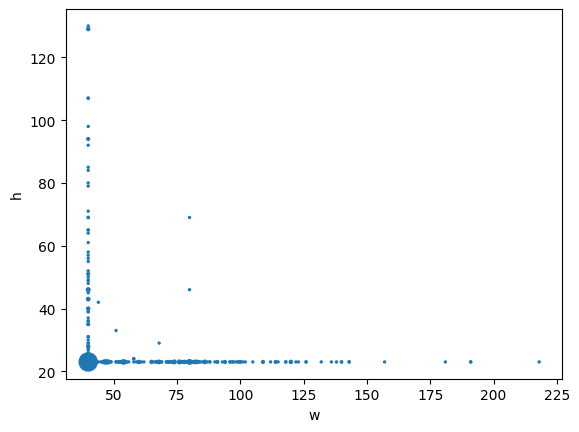

In [82]:
df_scatter.plot.scatter("w", "h", "count")

### 2 - Entities distribution